<a href="https://colab.research.google.com/github/Shreyaskkulkarni/Ethereum-Price-Prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ETH-USD.csv to ETH-USD.csv


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sb
import matplotlib.dates as mdates

In [ ]:
data=pd.read_csv("ETH-USD.csv")
data.shape

(2212, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2212 non-null   object 
 1   Open       2208 non-null   float64
 2   High       2208 non-null   float64
 3   Low        2208 non-null   float64
 4   Close      2208 non-null   float64
 5   Adj Close  2208 non-null   float64
 6   Volume     2208 non-null   float64
dtypes: float64(6), object(1)
memory usage: 121.1+ KB


In [ ]:
data.isnull().sum()

Date         0
Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64

In [ ]:
data=data.dropna()
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.shape

(2208, 7)

In [ ]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329.0
1,2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188.0
2,2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170.0
3,2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283.0
4,2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100.0


In [ ]:
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
2207,2021-08-22,3226.227295,3272.733154,3142.007080,3242.115479,3242.115479,1.598328e+10
2208,2021-08-23,3241.357422,3373.384277,3235.851318,3319.257324,3319.257324,2.051111e+10
2209,2021-08-24,3324.855469,3358.688232,3154.121338,3172.456299,3172.456299,2.013103e+10
2210,2021-08-25,3174.269775,3248.727295,3086.114990,3224.915283,3224.915283,1.890273e+10
2211,2021-08-26,3229.452148,3247.775391,3062.338867,3101.602051,3101.602051,1.783986e+10


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2.208000e+03
mean,433.578981,450.619491,414.840862,434.914512,434.914512,7.348590e+09
std,683.498443,713.295560,650.311554,685.738356,685.738356,1.075435e+10
min,0.431589,0.482988,0.420897,0.434829,0.434829,1.021280e+05
25%,14.167250,14.561175,13.567750,14.260150,14.260150,4.256840e+07
50%,203.964431,210.450729,196.916908,203.912002,203.912002,2.290465e+09
75%,408.495575,418.961944,394.578835,409.866516,409.866516,1.029495e+10
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.corr()


,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999006,0.997638,0.997259,0.997259,0.753510
High,0.999006,1.000000,0.997544,0.998702,0.998702,0.758350
Low,0.997638,0.997544,1.000000,0.998712,0.998712,0.742069
Close,0.997259,0.998702,0.998712,1.000000,1.000000,0.751418
Adj Close,0.997259,0.998702,0.998712,1.000000,1.000000,0.751418
Volume,0.753510,0.758350,0.742069,0.751418,0.751418,1.000000


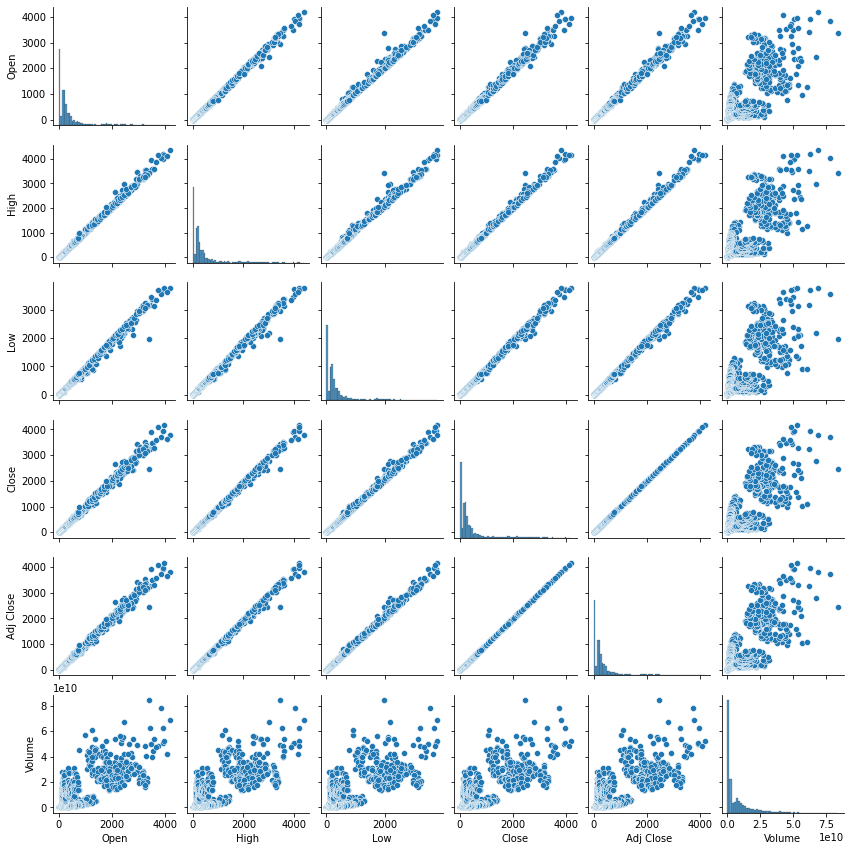

In [ ]:
sb.pairplot(data,height=2)

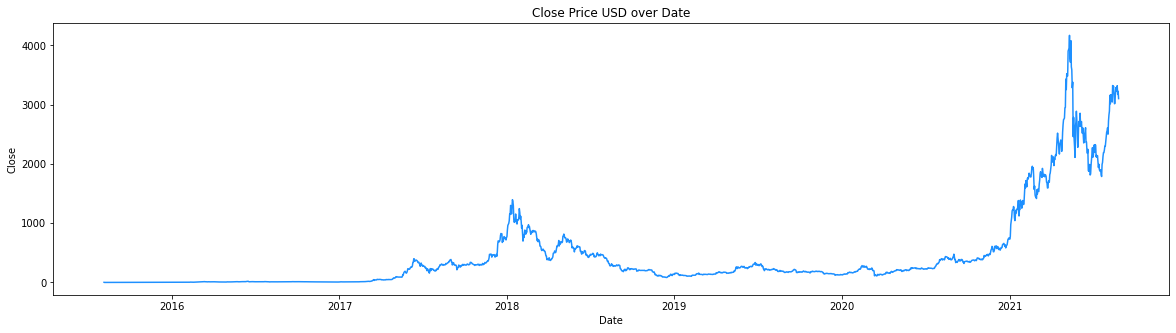

In [ ]:
data["Date"] = pd.to_datetime(data["Date"])
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

tmp_df = data.groupby(["Date"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sb.lineplot(data=tmp_df, x="Date", y="Close", color="dodgerblue")
plt.title('Close Price USD over Date')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


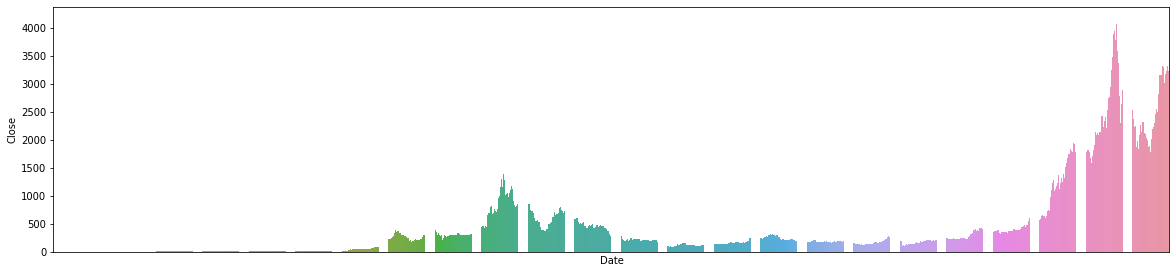

In [31]:
plt.figure(figsize=(20,5))
sb.barplot(tmp_df['Date'], tmp_df['Close'])
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.gcf().autofmt_xdate() 
plt.show()

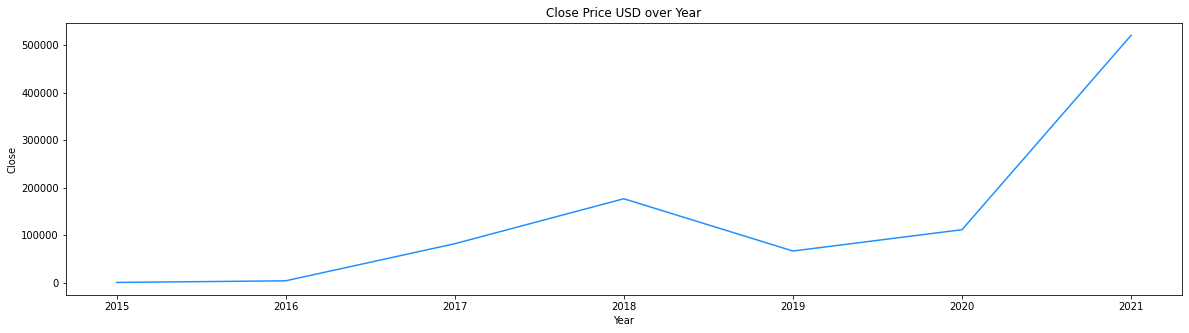

In [33]:
tmp_df = data.groupby(["Year"])["Close"].sum().reset_index()
plt.figure(figsize=(20,5))
sb.lineplot(data=tmp_df, x="Year", y="Close", color="dodgerblue")
plt.title('Close Price USD over Year')
plt.show()